#Import Libraries


In [ ]:
import pandas as pd # Data Manipulation
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

#Loading three datasets & Data Quality Assessment

# Customer Demographic dataset

In [87]:
# import dataset into a pandas data frame
cust_df = pd.read_excel ('/content/drive/MyDrive/CustomerDemographic.xlsx')

In [ ]:
#convert DOP column to a datetime
time_values = pd.to_datetime(cust_df['DOB'], format='%H:%M:%S').dt.time
cust_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
# summary of the data frame
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
# Check the shape of the dataframe
cust_df.shape

(4000, 13)

In [ ]:
# computes a summary of statistics pertaining to the numerical columns in datframe
cust_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


## Data Quality analysis for customer demographic
Improved data quality leads to better decision-making across an organization. The more high-quality data you have, the more confidence you can have in your decisions.
To evaluate the dataset, I will use the standard Data Quality dimensions.

###Data Accuracy

In [ ]:
sorted_df = cust_df.sort_values(by=['DOB'], ascending=True)
sorted_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


If you have a look at the first customer (Jephthah Bachmann, you'll notice that they were born in 1843, meaning that they are 175 years old! This is obviously an error in the data.
So I will subtract the date of today with each date in the DOP column and Drop the values that greater than the Life expectancy in Australlia at 2022 (83.79 years ~= 84) 


In [ ]:
#get the today's date
from datetime import datetime
today_date = datetime.strptime(datetime.today().strftime('%Y-%m-%d'), '%Y-%m-%d')

type(today_date)

datetime.datetime

In [ ]:
# create a new column "age"
cust_df['DOB'] = cust_df['DOB'].where(cust_df['DOB'] < today_date, cust_df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
cust_df['age'] = (today_date - cust_df['DOB']).astype('<m8[Y]')

In [ ]:
# filter the data to get the customer's age greater than 84 years old
cust_df[cust_df["age"]>84]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,178.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0,90.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0,86.0


There are three incorrect value so i will drop them

In [ ]:

#drop the column that the customer's age greater than 84 years old
cust_df_filtered = cust_df[cust_df['age'] < 84]
cust_df_filtered

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,68.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,41.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,60.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0,46.0
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,46.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,21.0
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,48.0


In [ ]:
# Check the shape of the new filtered dataframe
cust_df_filtered.shape

(3910, 14)

###Completeness : 
Check Missing Records or Null Attribute

In [ ]:
cust_df_filtered.isnull().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                214
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

In [ ]:
#-measure-data-completeness
print (cust_df_filtered.isna().sum().sum() / cust_df_filtered.size * 100)

2.7183047131896236


###Consistency 

In [ ]:
# check Consistency in gender column
cust_df_filtered['gender'].value_counts()

Female    2036
Male      1871
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [ ]:
# solve the Consistency in the column
cust_df_filtered = cust_df_filtered.replace(to_replace =['F','Femal'],
                 value ="Female").replace(to_replace =['M'],
                 value ="Male")

In [ ]:
cust_df_filtered['gender'].value_counts()

Female    2038
Male      1872
Name: gender, dtype: int64

### Relevancy

In [ ]:
cust_df_filtered.drop('default', axis=1, inplace=True)

In [ ]:
cust_df_filtered.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

###Uniqueness

In [ ]:
# Check if there is any duplications
cust_df_filtered.duplicated().sum()

0

In [ ]:
#Get the columns names
cust_df_filtered.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

# Customer address dataset

In [ ]:
# import dataset into a pandas data frame
addr_df = pd.read_excel ('/content/drive/MyDrive/CustomerAddress.xlsx')
addr_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
# summary of the data frame
addr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
# Check the shape of the dataframe
addr_df.shape

(3999, 6)

##Data Quality analysis for customer address

###Completeness :

Check Missing Records or Null Attribute

In [ ]:
addr_df.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

###Consistency In Data Representation

In [ ]:
# check Consistency in gender column
addr_df['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [ ]:
# solve the Consistency in the state column
addr_df.replace(to_replace =['New South Wales','Victoria'],
                 value =["NSW","VIC"],inplace=True)

In [ ]:
addr_df['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

#Transactions dataset

In [ ]:
# import dataset into a pandas data frame
trans_df = pd.read_excel ('/content/drive/MyDrive/Transactions.xlsx')
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
# summary of the data frame
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

##Data Quality analysis for Transactions dataset


###Accuracy

In [ ]:
#Create profit column
trans_df['profit']= trans_df['list_price'] - trans_df['standard_cost']

In [ ]:
#Display the first five rows of dataset
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


###Completeness :

Check Missing Records or Null Attribute

In [ ]:
trans_df.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
profit                     197
dtype: int64

there is missing values in online_order,brand,product_line,product_class, product_size,standard_Cost,product_first_sold_date and profit.

###Validity

In [ ]:
# converting the float to datetime format 
trans_df['product_first_sold_date'] = pd.to_datetime(trans_df['product_first_sold_date']).dt.date

In [ ]:
# Display the first five rows in the dataframe
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,1055.82


#Merge three datsets

In [ ]:
#Merge the three datasets into one
cust_add_merged_df = pd.merge(cust_df_filtered,addr_df,on='customer_id')
merged_df=pd.merge(cust_add_merged_df,trans_df,on='customer_id')

In [ ]:
#Display first five row in the dataframe
merged_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01,110.56
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01,751.02
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01,189.28
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01,90.10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87


In [ ]:
# visualize column names
merged_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit'],
      dtype='object')

In [ ]:
# Check the shape of the dataframe
merged_df.shape

(19498, 31)

In [ ]:
# summary of the data frame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19498 entries, 0 to 19497
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19498 non-null  int64         
 1   first_name                           19498 non-null  object        
 2   last_name                            18872 non-null  object        
 3   gender                               19498 non-null  object        
 4   past_3_years_bike_related_purchases  19498 non-null  int64         
 5   DOB                                  19498 non-null  datetime64[ns]
 6   job_title                            17158 non-null  object        
 7   job_industry_category                16276 non-null  object        
 8   wealth_segment                       19498 non-null  object        
 9   deceased_indicator                   19498 non-null  object        
 10  owns_car  

In [ ]:
#Count nulls
merged_df.isna().sum()

customer_id                               0
first_name                                0
last_name                               626
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
job_title                              2340
job_industry_category                  3222
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                    0
age                                       0
address                                   0
postcode                                  0
state                                     0
country                                   0
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            351
order_status                    

In [ ]:
#Check if there is any duplicated value
merged_df.duplicated().sum()

0

In [ ]:
#clean data from nulls
merged_df.dropna(inplace=True)

In [ ]:
#Count nulls
merged_df.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line    

In [ ]:
# Check the shape of the dataframe
merged_df.shape

(13613, 31)

In [ ]:
#create an age group column AgeGroup
merged_df.loc[merged_df['age'].between(18,27), 'age_group'] = '18-27'
merged_df.loc[merged_df['age'].between(28,37), 'age_group'] = '28-37'
merged_df.loc[merged_df['age'].between(38,47), 'age_group'] = '38-47'
merged_df.loc[merged_df['age'].between(48,58), 'age_group'] = '48-58'
merged_df.loc[merged_df['age'].between(59,78), 'age_group'] = '59-78'

In [ ]:
merged_df['age_group'].value_counts()

38-47    4204
48-58    3028
28-37    2562
59-78    2150
18-27    1669
Name: age_group, dtype: int64

#Customer Segmentation Analysis

##Demographic Segmentation

###Age segemntation

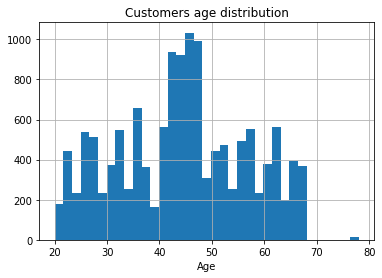

In [ ]:
# Create a histogram of ages
merged_df.hist('age', bins=35);
plt.title('Customers age distribution');
plt.xlabel('Age');

In [ ]:
df_pivot = pd.pivot_table(
	merged_df,
	values="profit",
	index="age_group",
	columns="wealth_segment",
	aggfunc=sum
)

In [ ]:
df_pivot

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
18-27,275391.06,190644.54,458777.90
28-37,338450.35,418091.46,655769.76
38-47,558556.83,558582.72,1215103.07
48-58,412707.14,451476.39,830816.00
59-78,292719.13,274242.01,585876.10


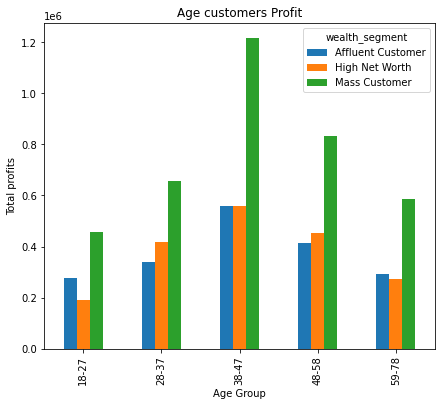

In [ ]:
# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("Age Group")
ax.set_ylabel("Total profits")
ax.set_title("Age customers Profit")

# Use this to show the plot in a new window
plt.show()


Based on the graph we can see that the age group from 38-47 brings the highest profit for this business and we can see that the mass customer segmentation overall performs better compared to any other wealth segment. So if we will be targeting new customers then we should focus more on the mass customer wealth segment and we should focus more on the age group between 38 to 47 as those people have a higher buying power compared to other groups.

##Geographic Segmentation

###Own car versus state segemntation

In [ ]:
merged_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'age_group'],
      dtype='object')

In [ ]:
merged_df.owns_car.value_counts()

Yes    6901
No     6712
Name: owns_car, dtype: int64

In [ ]:
pivot_df = pd.pivot_table(
	merged_df,
	values="owns_car",
	index="state",
	columns=merged_df['owns_car'],
	aggfunc={'owns_car': 'count'}
)

In [ ]:
pivot_df

owns_car,No,Yes
state,,
NSW,3521,3680
QLD,1483,1522
VIC,1708,1699


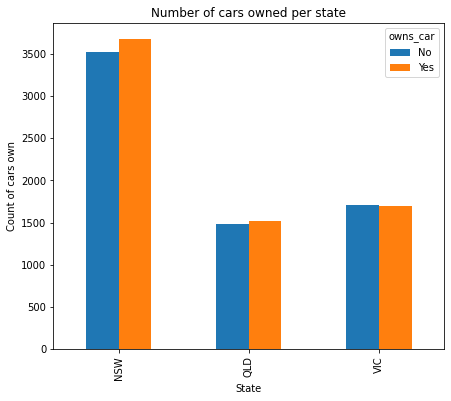

In [ ]:
# Plot a bar chart using the DF
ax = pivot_df.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)
# Change the axes labels
ax.set_xlabel("State")
ax.set_ylabel("Count of cars own")
ax.set_title("Number of cars owned per state")
# Use this to show the plot in a new window
plt.show()


##Firmographic Segmentation

### Bike related purchase based on Industry segemntation



In [ ]:
bike_pivot_df = pd.pivot_table(
	merged_df,
	values="past_3_years_bike_related_purchases",
	index='job_industry_category',
	aggfunc='count'
)

In [ ]:
bike_pivot_df

,past_3_years_bike_related_purchases
job_industry_category,
Argiculture,482
Entertainment,586
Financial Services,3228
Health,2653
IT,574
Manufacturing,3322
Property,1087
Retail,1396
Telecommunications,285


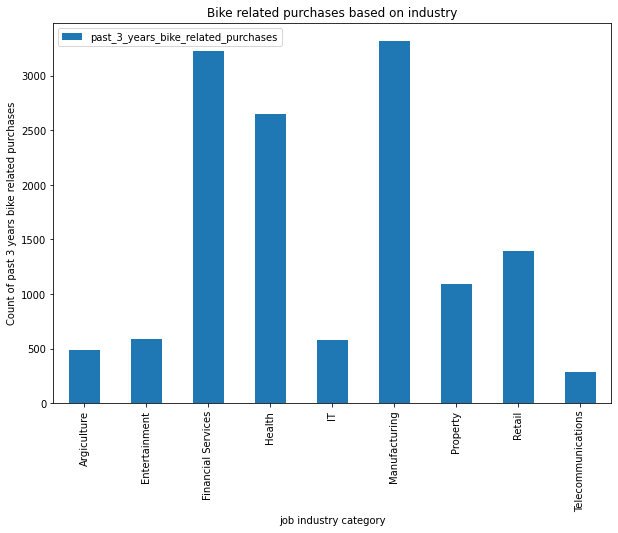

In [ ]:
# Plot a bar chart using the DF
ax = bike_pivot_df.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 7)
# Change the axes labels
ax.set_xlabel("job industry category")
ax.set_ylabel("Count of past 3 years bike related purchases")
ax.set_title("Bike related purchases based on industry")
# Use this to show the plot in a new window
plt.show()


In [ ]:
gender_pivot_df = pd.pivot_table(
	merged_df,
	values="past_3_years_bike_related_purchases",
	index='gender',
	aggfunc='count'
)

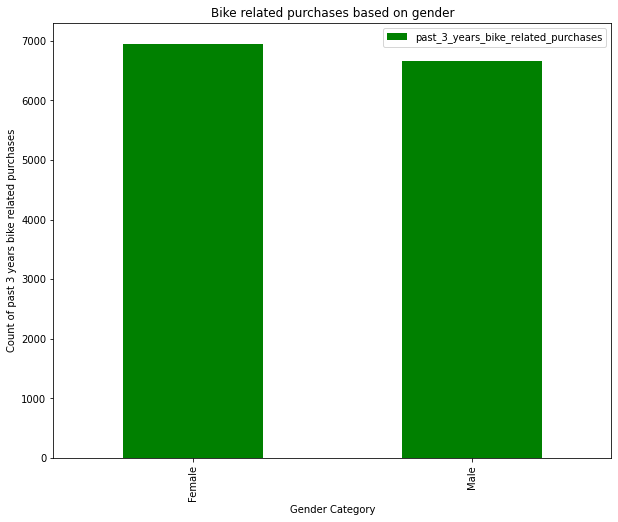

In [ ]:
# Plot a bar chart using the DF
ax = gender_pivot_df.plot(kind="bar",color=['green'])
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)
# Change the axes labels
ax.set_xlabel("Gender Category")
ax.set_ylabel("Count of past 3 years bike related purchases")
ax.set_title("Bike related purchases based on gender")
# Use this to show the plot in a new window
plt.show()


###Job industry category based on the profit segemntation

In [ ]:
job_pivot_df = pd.pivot_table(
	merged_df,
	values="profit",
	index='job_industry_category',
	aggfunc='sum'
)

In [ ]:
job_pivot_df

,profit
job_industry_category,
Argiculture,255212.87
Entertainment,326459.13
Financial Services,1840374.01
Health,1429215.25
IT,313201.16
Manufacturing,1810040.41
Property,596263.31
Retail,790187.12
Telecommunications,156251.20


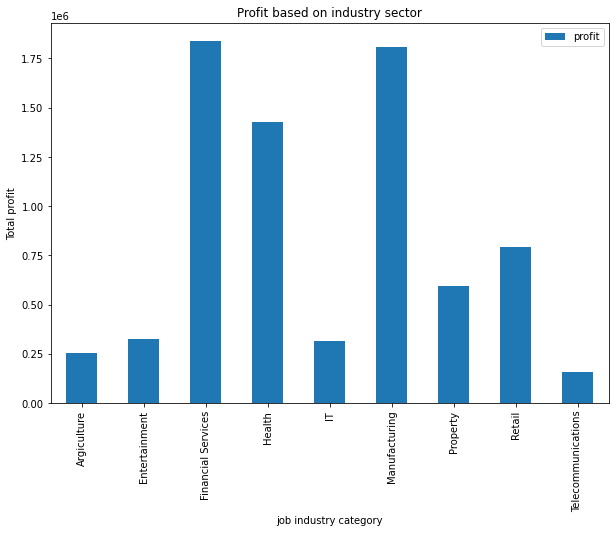

In [ ]:
# Plot a bar chart using the DF
ax = job_pivot_df.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 7)
# Change the axes labels
ax.set_xlabel("job industry category")
ax.set_ylabel("Total profit")
ax.set_title("Profit based on industry sector")
# Use this to show the plot in a new window
plt.show()


##RFM segemntation

In [ ]:
#sort all values in a descending order to get the most recent transaction date and use that date as a comparison date
merged_df.sort_values(by=['transaction_date'], ascending=False)['transaction_date']


14897   2017-12-30
5636    2017-12-30
3826    2017-12-30
13243   2017-12-30
17485   2017-12-30
           ...    
17127   2017-01-01
10381   2017-01-01
17676   2017-01-01
769     2017-01-01
1309    2017-01-01
Name: transaction_date, Length: 13613, dtype: datetime64[ns]

In [ ]:
merged_df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'age_group'],
      dtype='object')

In [ ]:
comparison_date = date(2017, 12, 30)
print(comparison_date)
type(comparison_date)

2017-12-30


datetime.date

In [ ]:
# create recency column by subtracting the transaction column from comparison date
merged_df['Recency'] = pd.to_datetime(comparison_date)- merged_df['transaction_date'] 
merged_df['Recency']=merged_df['Recency'].dt.days

In [ ]:
# Aggregating for multiple features
customers_data = pd.pivot_table(data=merged_df, index=['customer_id','first_name'], values=['product_id', 'Recency','profit'],
                        aggfunc={'product_id': 'count', 'Recency': np.min , 'profit':sum})
customers_data

,,Recency,product_id,profit
customer_id,first_name,,,
1,Laraine,7,11,3018.09
2,Eli,128,3,2226.26
9,Mala,78,6,2353.11
12,Sawyere,67,7,3540.03
13,Gabriele,27,7,4337.38
...,...,...,...,...
3493,Jeffie,93,6,3728.88
3494,Robers,4,4,2755.11
3495,Constantine,13,7,3847.65


In [ ]:
customers_data.columns = ['Recency', 'Frequency', 'Monetary']
customers_data.head()

,,Recency,Frequency,Monetary
customer_id,first_name,,,
1,Laraine,7,11,3018.09
2,Eli,128,3,2226.26
9,Mala,78,6,2353.11
12,Sawyere,67,7,3540.03
13,Gabriele,27,7,4337.38


In [ ]:
def calculate_rfm_scores(column_name,labels):
  return(pd.cut(customers_data[column_name], 
                                       bins=[-1, 
                                         np.percentile(customers_data[column_name], 25), 
                                             np.percentile(customers_data[column_name], 50), 
                                             np.percentile(customers_data[column_name], 75), 
                                             customers_data[column_name].max()], 
                                       labels=labels).astype("int"))



In [ ]:
customers_data["R_Score"] = calculate_rfm_scores('Recency',[4, 3, 2, 1])
customers_data["F_Score"] = calculate_rfm_scores('Frequency',[1, 2, 3, 4])
customers_data["M_Score"] = calculate_rfm_scores('Monetary',[1, 2, 3, 4])

In [ ]:
customers_data

,,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
customer_id,first_name,,,,,,
1,Laraine,7,11,3018.09,4,4,3
2,Eli,128,3,2226.26,1,1,2
9,Mala,78,6,2353.11,2,3,2
12,Sawyere,67,7,3540.03,2,3,3
13,Gabriele,27,7,4337.38,3,3,4
...,...,...,...,...,...,...,...
3493,Jeffie,93,6,3728.88,1,3,3
3494,Robers,4,4,2755.11,4,1,2
3495,Constantine,13,7,3847.65,4,3,3


In [ ]:
customers_data["RFM"] = 100 * customers_data["R_Score"] + 10 * customers_data["F_Score"] + customers_data["M_Score"]

In [ ]:
customers_data

,,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM
customer_id,first_name,,,,,,,
1,Laraine,7,11,3018.09,4,4,3,443
2,Eli,128,3,2226.26,1,1,2,112
9,Mala,78,6,2353.11,2,3,2,232
12,Sawyere,67,7,3540.03,2,3,3,233
13,Gabriele,27,7,4337.38,3,3,4,334
...,...,...,...,...,...,...,...,...
3493,Jeffie,93,6,3728.88,1,3,3,133
3494,Robers,4,4,2755.11,4,1,2,412
3495,Constantine,13,7,3847.65,4,3,3,433


In [ ]:
#Get quartile
lower_quartile,median,upper_quartile =customers_data.RFM.quantile([0.25,0.5,0.75])
mini = customers_data.RFM.min()
maximum = customers_data.RFM.max()

In [ ]:
# create customer_segment function

def segment_customers(rfm):
  val = ' '
  if rfm['RFM'] >= int(upper_quartile):
      val='Platinum Customer'
  elif rfm['RFM'] > int(median):
      val= 'Gold Customer'
  elif rfm ['RFM']> int(lower_quartile):
      val='Silver Customer'
  elif rfm['RFM'] >= int(mini):
      val='Bronze Customer'
  return val

In [ ]:
customers_data['Customer_profile'] = customers_data.apply(segment_customers, axis=1)

In [ ]:
customers_data.sort_values(by=['Monetary'], ascending=False).head(15)


,,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM,Customer_profile
customer_id,first_name,,,,,,,,
941,Tye,33,10,11668.95,3,4,4,344,Gold Customer
2637,Marcile,54,11,11222.65,2,4,4,244,Silver Customer
1460,Morley,12,8,10787.60,4,4,4,444,Platinum Customer
1558,Oberon,8,9,10640.30,4,4,4,444,Platinum Customer
3326,Wes,29,13,10422.04,3,4,4,344,Gold Customer
322,De,1,11,10336.77,4,4,4,444,Platinum Customer
2770,Olvan,30,9,10028.80,3,4,4,344,Gold Customer
195,Talyah,0,7,9633.41,4,3,4,434,Platinum Customer
363,Sabrina,14,6,9458.17,4,3,4,434,Platinum Customer


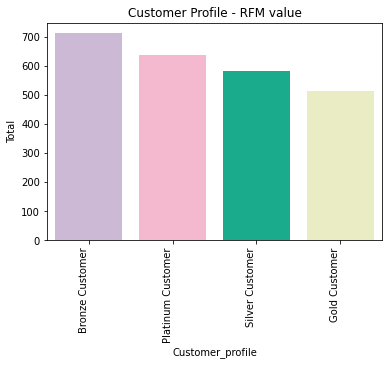

In [ ]:
sns.countplot(x= 'Customer_profile',  data=customers_data,palette=["#cdb4db", "#ffafcc",'#02c39a','#f0f3bd'],order = customers_data['Customer_profile'].value_counts().index)
plt.xlabel('Customer_profile')
plt.ylabel('Total')
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light')
plt.title('Customer Profile - RFM value')
plt.show()

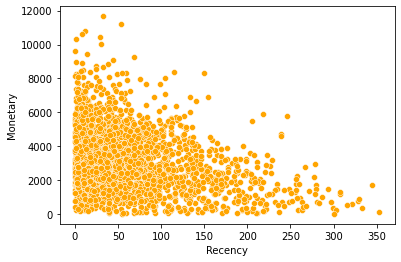

In [ ]:
# Monetary vs Recency for each segment
#sns.lmplot(x='Recency', y='Monetary', data=customers_data, col='Customer_profile', hue='Customer_profile', fit_reg=True)
sns.scatterplot(x='Recency', y='Monetary', data=customers_data,color='orange')


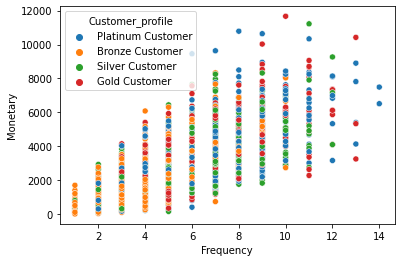

In [ ]:
sns.scatterplot(x='Frequency', y='Monetary', data=customers_data,color='red',hue='Customer_profile')


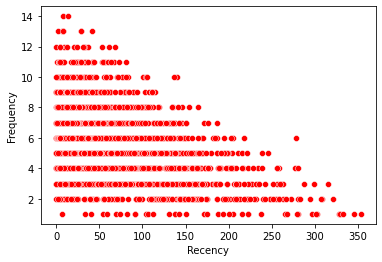

In [ ]:
sns.scatterplot(x='Recency', y='Frequency', data=customers_data,color='red')
